In [10]:
import random
import matplotlib.pyplot as plt
import numpy as np
from numba import njit, prange

In [28]:
sample = 5000 #number of samples per experiment

sarray = []
steparray= []
samplearray= []
s_div_arr = []

plt.rcParams["figure.figsize"] = (20,10)
def nprandomwalk(sample):
    
    for steps in range(10,100,10):
        s=0
        for t in range(0,sample):
            #samplearray.append(t)
            distance = 0
            
            for x in range(0,steps):
                
                s_1 = np.random.random()

                if s_1 >= 0.5:

                    distance = distance+1
                    #s = s + distance**2
                    #sarray.append(s)
                    #steparray.append(steps)

                else:
                    
                    distance = distance-1
                    #s = s + distance**2
                    #sarray.append(s)
                    #steparray.append(steps)
                #print(distance)
            s = s + np.square(distance)
    
        sarray.append(s)
        steparray.append(steps)
        
        #print(sarray)
    s_div_samp = [x / sample for x in sarray]
    s_div_arr.append(s_div_samp)
    print(len(steparray))
    return steparray, s_div_arr

9


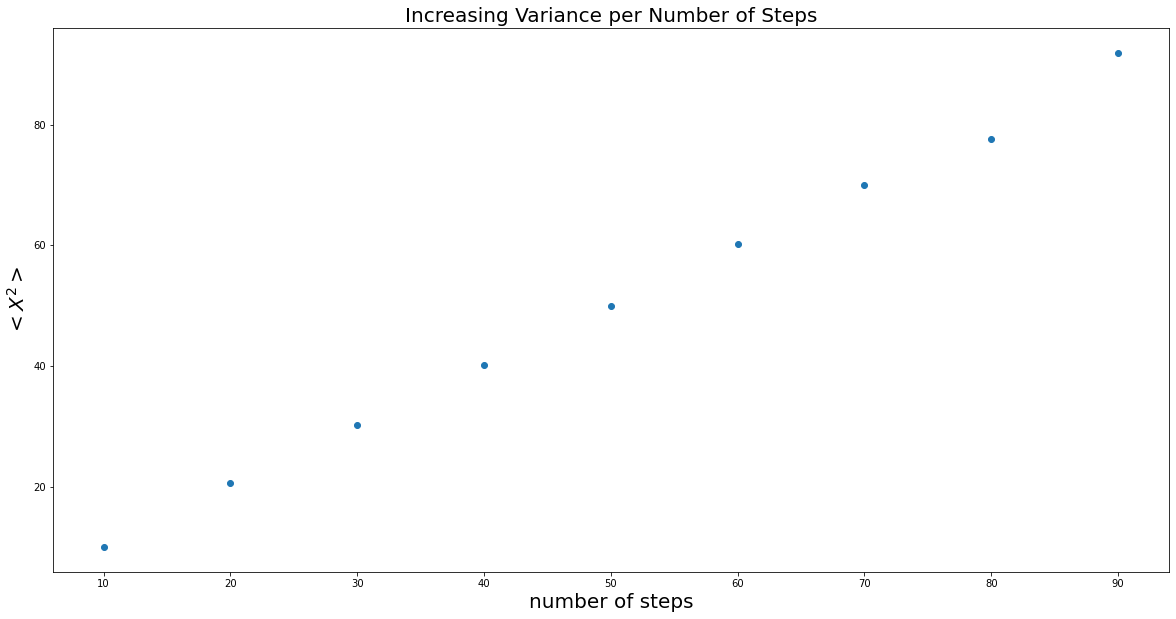

In [29]:
nprandomwalk(sample)
plt.title("Increasing Variance per Number of Steps", fontsize=20)
plt.xlabel("number of steps", fontsize=20)
plt.ylabel("$< X^{2} >$", fontsize=20)
plt.scatter(steparray,s_div_arr)

In [20]:
def randomwalk(sample):
    
    for steps in range(10,100,10):
        s=0
        for t in range(0,sample):
            #samplearray.append(t)
            distance = 0
            
            for x in range(0,steps):
                
                s_1 = (random.random())

                if s_1 >= 0.5:

                    distance = distance+1
                    #s = s + distance**2
                    #sarray.append(s)
                    #steparray.append(steps)

                else:
                    
                    distance = distance-1
                    #s = s + distance**2
                    #sarray.append(s)
                    #steparray.append(steps)
                #print(distance)
            s = s + distance**2
    
        sarray.append(s)
        steparray.append(steps)
        
        #print(sarray)
    s_div_samp = [x / sample for x in sarray]
    s_div_arr.append(s_div_samp)
    return steparray, s_div_arr

In [21]:
%timeit nprandomwalk(sample)

880 ms ± 5.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%timeit randomwalk(sample)

287 ms ± 4.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
samplesize = 5000
experiments=100

@njit
def numpywalk(samplesize):
    sample_array=np.empty((samplesize,experiments))
    
    step=0
    for exp in prange(0,experiments,10):
        t = np.arange(0,samplesize,1)
        print(t)
        #print('exp= ',exp)
        sample_array[:,0] = t
        
        
    distance = 0  
    
    step_array = np.empty_like(sample_array[:,0])
    for trials in prange(0,len(sample_array[:,0])):
        #print(trials)
        roll = random.random()
        
        if roll >= 0.5:
            distance = distance + 1
            
        else:
            distance = distance - 1
        """
        print(#roll,"\n",
              "trial number:",trials,"\n",
              "distance", distance)
        """
        step = step + distance**2
        step_array[trials] = step
        #print(step,trials)
    print(step_array.shape)
    #print(step_array)
    #print("sample array shape:",sample_array.shape)
    #print(sample_array[:100,0])
    

In [37]:
numpywalk(samplesize)


[   0    1    2 ... 4997 4998 4999]
[   0    1    2 ... 4997 4998 4999]
[   0    1    2 ... 4997 4998 4999]
[   0    1    2 ... 4997 4998 4999]
[   0    1    2 ... 4997 4998 4999]
[   0    1    2 ... 4997 4998 4999]
[   0    1    2 ... 4997 4998 4999]
[   0    1    2 ... 4997 4998 4999]
[   0    1    2 ... 4997 4998 4999]
[   0    1    2 ... 4997 4998 4999]
(5000,)
